# Final Project

### Collaborators
#### Thomas Martinez,  Jacob Fiola, Katherine Best

## Intialization 

Gather the Data Set and set static variables we require.

In [0]:
import numpy as np
import pandas as pd
import math as mt
import statsmodels.api as sm 
import matplotlib.pyplot as plt

In [0]:
##  Run this cell (you might have to run it a couple times) and then select the 
# data from the browser to load it.
# Use the modified version of the data file.
from google.colab import files
uploaded = files.upload()
# try:
#     df = pd.read_csv('Trees_Public.csv')

Saving Trees_Public_Modified.csv to Trees_Public_Modified.csv


In [0]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Trees_Public_Modified.csv']))

## Data Processing

In [0]:
# Columns dropped because the fields are unstructured strings 
df = df.drop(columns=['STREET', 'ONSTR', 'FROMSTR', 'TOSTR','SIDE','NOTES']) 

# Columns dropped because all rows (or almost all the rows) in the column have the same value
df = df.drop(columns=['GRATESZ', 'GUARDSZ', 'CULTIVAR'])

# Columns dropped because I didn't want to deal with them
df = df.drop(columns=['JURISDIC', 'UNIQUEID','INSPECT_DT','INV_DATE', 'INV_TIME','INSPECT_TM'])


df.head()

,XCoord,YCoord,FID,ID,ADDRESS,SUFFIX,SITE,SPP,DBH,CONDITION,INSPECT,MT,MT2,TTYPE,MEMTREE,DISEASEDEF,STRUTDEFEC,LOCTYPE,SITECAT,HOOD,LOCATION,TSIP,ACTIVE,COMMONNAME
0,3.066896e+06,1.255948e+06,0,38718.0,2631,,26,Populus hybrid,3.0,Excellent,N,No Specific Maintenance Need,Routine,Deciduous,No,NaN,NaN,Park,Turf,Park,Elmer's Two Mile,N,1.0,Hybrid Cottonwood
1,3.062702e+06,1.263032e+06,1,43007.0,4501,,33,Ulmus pumila,15.0,Fair,N,Safety Prune,Priority 3,Deciduous,No,NaN,NaN,Park,Natural Area,Park,Violet Park,N,1.0,Siberian Elm
2,3.059594e+06,1.262647e+06,2,38080.0,1001,X,127,Gleditsia triacanthos,4.0,Good,N,No Specific Maintenance Need,Routine,Deciduous,No,NaN,NaN,Park,Turf,Park,Foothills Community Park,N,1.0,Common Honeylocust
3,3.060579e+06,1.245955e+06,3,39118.0,1201,,78,Fraxinus pennsylvanica,31.0,Fair,Y,Safety Prune,Routine,Deciduous,No,NaN,deadwood,Park,Turf,Park,Columbia Cemetery,N,1.0,Green Ash
4,3.068895e+06,1.247883e+06,4,39917.0,1505,,6,Pyrus spp.,3.0,Good,N,No Specific Maintenance Need,Routine,Deciduous,No,NaN,trunk wounds,Park,Shrub /Mulch bed,Park,Scott Carpenter Park,N,1.0,Pear species


In [0]:
# Turning some columns into numeric scales
df['CONDITION'] = df['CONDITION'].replace('Dead',0)
df['CONDITION'] = df['CONDITION'].replace('Very Poor',1)
df['CONDITION'] = df['CONDITION'].replace('Poor',2)
df['CONDITION'] = df['CONDITION'].replace('Fair',3)
df['CONDITION'] = df['CONDITION'].replace('Good',4)
df['CONDITION'] = df['CONDITION'].replace('Excellent',5)

df['MT2'] = df['MT2'].replace('Routine', 0)
df['MT2'] = df['MT2'].replace('Priority 1', 1)
df['MT2'] = df['MT2'].replace('Priority 2', 2)
df['MT2'] = df['MT2'].replace('Priority 3', 3)

df['MEMTREE'] = df['MEMTREE'].replace('No', 0)
df['MEMTREE'] = df['MEMTREE'].replace('Yes', 1)
df['INSPECT'] = df['INSPECT'].replace('N', 0)
df['INSPECT'] = df['INSPECT'].replace('Y', 1)

df['TSIP'] = df['TSIP'].replace('N', 0)
df['TSIP'] = df['TSIP'].replace('Y', 1)

df['SUFFIX'] = df['SUFFIX'].replace(' ', 1)
df['SUFFIX'] = df['SUFFIX'].replace('X', 0)

In [0]:
# Some columns with non-ordinal, but finite ranges can be converted into the combination of a bunch of indicator columns
from collections import Counter

def col_expand(df, col_name):
  vals = Counter(df[col_name])
  print(vals)
  for val in vals:
    if not(val is np.nan):
      df[val] = df[col_name]
      df[val] = df[val].replace(val, 1)
      df[val][df[val] != 1] = 0
  df = df.drop(columns=[col_name])
  return df

In [0]:
# Expanding the columns with non-ordinal, finite ranges
df = col_expand(df,'TTYPE')
df = col_expand(df,'SITECAT')
df = col_expand(df,'MT')
df = col_expand(df,'DISEASEDEF')
df['HOOD'] = df['HOOD'].replace('Park', 'Park_nbhd')
df = col_expand(df,'HOOD')
df = col_expand(df,'LOCTYPE')
df = col_expand(df,'LOCATION')
df = col_expand(df,'STRUTDEFEC')
df = col_expand(df,'SPP')
df = col_expand(df,'COMMONNAME')

Counter({'Deciduous': 738, nan: 200, 'Evergreen': 74})
Counter({'Turf': 522, 'Natural Area': 263, 'Shrub /Mulch bed': 157, 'Rock bed': 22, 'Bare dirt': 17, 'Parking Lot Island': 12, 'Raised Planter': 9, 'Pavers / Bricks': 5, 'Tree Grate': 4, 'Open Pit': 1})
Counter({'No Specific Maintenance Need': 621, 'Safety Prune': 254, 'Structure Prune': 44, 'Remove': 37, 'Remove Stakes': 26, 'Treat Pest': 21, 'Other - See Notes': 7, 'Stake': 1, 'REMOVE WHOLE TREE': 1})
Counter({nan: 898, 'other - see notes': 27, 'signs of stress': 22, 'crown dieback': 18, 'needle necrosis': 12, 'foliage disorder': 10, 'borers': 7, 'thin canopy': 5, 'sunscald': 4, 'scale insects': 4, 'hypoxylon canker': 2, 'armillaria': 1, 'cankers': 1, 'sapsucker damage': 1})
Counter({'Park_nbhd': 664, nan: 160, 'Mapleton Hill': 50, 'Northeast Boulder': 45, 'University Hill': 38, 'Whittier': 20, 'Northwest Boulder': 19, 'East Boulder': 4, 'Goss/Grove': 4, 'Iris': 4, 'Northeast Broadway': 2, 'Broadway Southwest': 1, 'Baseline South

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


Counter({nan: 631, 'deadwood': 60, 'large leader or limb decay': 35, 'trunk wounds': 28, 'other - see notes': 27, 'Co-dominants': 27, 'dead leaders': 23, 'dead trunk tissue': 22, 'cavity / decay': 20, 'previous failure': 19, 'basal wound': 15, 'trunk decay': 13, 'included bark': 12, 'hangers': 12, 'Large Limbs/scaffold defect': 10, 'leaning - not corrected': 10, 'utility pruned': 7, 'stress epicormics': 5, 'basal decay': 4, 'serious decline': 4, 'girdling roots': 4, 'multiple attachments': 3, 'topped': 3, 'fusing limbs': 3, 'restricted grow space': 2, 'root damage': 2, 'lawnmower damage': 2, 'leaning - corrected': 2, 'storm damage': 1, 'expansion cracks': 1, 'vertical stress cracks': 1, 'excessive end weight': 1, 'crotch split': 1, 'horizontal stress cracks': 1, 'dead root tissue': 1})
Counter({'Fraxinus pennsylvanica': 137, 'Populus species': 93, 'Acer saccharinum': 78, 'Populus sargentii': 64, 'Gleditsia triacanthos': 55, 'Pinus nigra': 44, 'Malus sylvestris': 38, 'Ulmus pumila': 33,

In [0]:
# Extracting the response to be regressed on
scoreVals = df["CONDITION"]
df = df.drop(columns = ["CONDITION"])


## PCA

First, we center and scale the data.  Centering the data alows us to use SVD to perform PCA later and scaling the data allows us to compare variables on different scales to one-another.

In [0]:
A = np.array(df, dtype='float')

for col in range(A.shape[1]):
  A[:,col] = A[:,col]- np.mean(A[:,col])
  if np.std(A[:,col]) != 0:
    A[:,col] = A[:,col] / np.std(A[:,col])

In the following cell we compute the sigular value decomposition of a matrix.  In this implementation we use the ```eigh``` function from numpy's linalg package to comute the eigenvectors and eigenvalues required for SVD because this function is capable of taking advantage of the symmetric nature of the matrices in question.

In [0]:
def my_SVD(M):
  MTM = np.matmul(M.T,M)
  MMT = np.matmul(M,M.T)
  mtm_eigenvals, mtm_eigenvecs = np.linalg.eigh(MTM)
  mmt_eigenvals, mmt_eigenvecs = np.linalg.eigh(MMT)
  non_zero_indices = mtm_eigenvals < 1e-8
  mtm_eigenvals[non_zero_indices] = 0
  non_zero_indices = mmt_eigenvals < 1e-8
  mmt_eigenvals[non_zero_indices] = 0
  r = np.count_nonzero(mtm_eigenvals)
  S = np.zeros(r)
  U = np.zeros((M.shape[0], r))
  V = np.zeros((M.shape[1], r))
  v_idxs = np.flip(np.argsort(mtm_eigenvals), axis=0)
  u_idxs = np.flip(np.argsort(mmt_eigenvals), axis=0)
  for i in range(r):
      V[:,i] = mtm_eigenvecs[:, v_idxs[i]]
      U[:,i] = mmt_eigenvecs[:, u_idxs[i]]
      S[i] = np.sqrt(mtm_eigenvals[v_idxs[i]])
  return U, S, V.T

Next we compute the basis used in PCA using the SVD.  This function is essentially a wrapper function for SVD that makes the PCA application more apparent and allows for simpler code later on.

In [0]:
def my_PCA(A, ret_extra_info=False):
  u,s,vt = my_SVD(A)
  if not ret_extra_info:
    return vt
  
  energy_ratio = s**2 / sum(s**2)
  return vt, s, energy_ratio


Note that the columns of $V$ (or the rows of $V^T$) are the directions of the axes of the basis produced by PCA.  Also note that the ratio of the total energy accounted for by each singular value is also the ratio of the total variance that is explained by the associated basis vector.

In [0]:
n = A.shape[0]

basis, singular_values, energy_ratios = my_PCA(A, ret_extra_info=True)

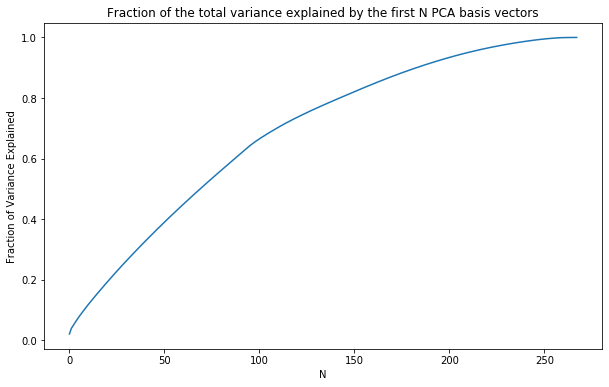

In [0]:
plt.figure(figsize=(10,6))
plt.plot(np.cumsum(energy_ratios))
plt.xlabel('N')
plt.ylabel('Fraction of Variance Explained') 
plt.title('Fraction of the total variance explained by the first N PCA basis vectors')
plt.show()

In [0]:
print('Variance accounted for by first 20 basis vectors', np.cumsum(energy_ratios[0:20])[-1])
print('Variance accounted for by first 70 basis vectors', np.cumsum(energy_ratios[0:70])[-1])

Variance accounted for by first 20 basis vectors 0.1855652997445559
Variance accounted for by first 70 basis vectors 0.500847158709926


Here we plot the data projected onto the first two PCA axes.

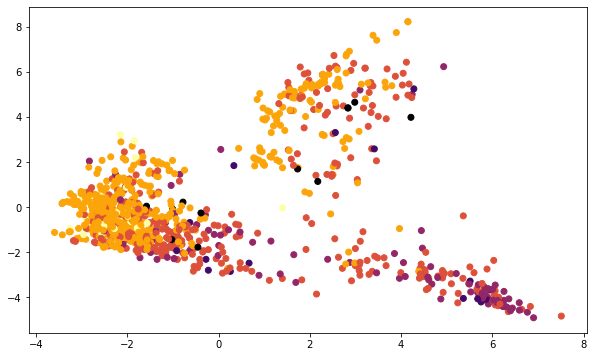

In [0]:
plt.figure(figsize=(10,6))
x = np.matmul(A,basis[0])
y = np.matmul(A,basis[1])
plt.scatter(x,y,c=scoreVals ,cmap='inferno');

## Regression

Now, lets try out some regression methods. We will be using MLR, in which components are derived from 1 of 3 methods:

Traditional Method) Traditional backward selection

Hybrid method 1) Half of the columns are method 1, the other half takes the entire rest of the dataset, puts into pca, and takes however many principle components are needed to fullfill the other half of the columns

Hybrid method 2) all but one of the columns are method 1, the one remaining column takes the entire rest of the dataset, puts into pca, and takes the most principle component.

In [0]:
a = np.array([1])
a.shape[0]

1

In [0]:
def makeB(top_x_features,columnsKept,numPrincipleComponents):
  A = np.array(df.drop(labels=columnsKept,axis=1),dtype='float')
  basis = my_PCA(A)[0:numPrincipleComponents]
  B = np.zeros((len(A),numPrincipleComponents))

  #print("num columns in A ", len(A[0]))
  #print("len of basis is ",len(basis))

  # produce a "principal tree score" for each tree which uses each of its attributes.
  # These tree scores are just dot products of a Principal component row and a tree row in A. We can choose how many principal components to look at. All principal components orthogonal.
  B = np.matmul(A,basis.T)
  #for x in range(0,len(A)):
  #  for i in range(0,len(basis)):
  #    B[x][i] = np.sum(A[x]*basis[i])
  if top_x_features.shape[0] != 0:
    B = np.concatenate((B,top_x_features),axis=1)
  return B

def regress(A):
  A = sm.add_constant(A)
  #fit the ordinary least-squares model
  model_tree = sm.OLS(scoreVals,A).fit()
  return model_tree


In [0]:
#Backward selection.
i = []
rsquares = []
regresses = []
rsquares_adj = []

numRows = len(A)

reg = regress(A.astype(float))
def backward_select(A,numColumnsToKeep):
    
    remaining_features = A
    # initialize good features list
    # - backward select start with all of them, and drops highest p-value
    good_features = remaining_features
    
    # perform backward selection 
    stage = 1
    model = regress(A)
    ssr = model.ssr
    toReturn = A
    names = list(df.columns.values)

    print("Backward selecting A to only keep " + str(numColumnsToKeep) + " most important columns.")
    while toReturn.shape[1] >numColumnsToKeep:
        rem_feat = model.pvalues.idxmax()   # candidate feature to remove is one with highest p-value
        if 'x' in rem_feat:
          indexToRem = int(rem_feat.strip('x'))-1
          A = np.delete(A,indexToRem,1)
          del(names[indexToRem])
          toReturn = A.copy()
          model = regress(A)
          ssr = model.ssr
          stage += 1
    print("Done.")
    return toReturn,names


In [0]:
   
top_10_features,feature_names = backward_select(A,10)
top_20_features,feature_names2 = backward_select(A,20)

Backward selecting A to only keep 10 most important columns.
Done.
Backward selecting A to only keep 20 most important columns.
Done.


In [0]:
feature_names

['DBH',
 'No Specific Maintenance Need',
 'Safety Prune',
 'Structure Prune',
 'Treat Pest',
 'Remove Stakes',
 'Other - See Notes',
 'crown dieback',
 'Acer saccharinum',
 'Silver Maple']

In [0]:
top_5_features, feature_names = backward_select(top_10_features,5)
B = makeB(top_5_features,feature_names,5) #hybrid method 1, outside the for loop
reg = regress(B)
reg.summary()

Backward selecting A to only keep 5 most important columns.
Done.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              CONDITION   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     113.5
Date:                Wed, 18 Dec 2019   Prob (F-statistic):          3.85e-157
Time:                        00:00:15   Log-Likelihood:                -893.85
No. Observations:                1012   AIC:                             1810.
Df Residuals:                    1001   BIC:                             1864.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -20.5227      6.720     -3.054      0.002     -33.709      -7.337
x1           7.79e-06   2.19e-06      3.559      0.000     3.5e-06    1.21e-05
x2             0.0002   8.83e-05      2.023      0.043     5.4e-06       0.000
x3            -0.0222      0.002    -11.012      0.000      -0.026      -0.018
x4            -0.1249      0.025     -5.046      0.000      -0.174      -0.076
x5            -0.3875      0.243     -1.592      0.112      -0.865       0.090
x6             1.0128      0.048     20.992      0.000       0.918       1.107
x7             0.7217      0.041     17.422      0.000       0.640       0.803
x8             0.3811      0.026     14.547      0.000       0.330       0.433
x9             0.2621      0.023     11.559      0.000       0.218       0.307
x10            0.3474      0.024     14.634      0.000       0.301       0.394
==============================================================================
Omnibus:                       23.850   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.323
Skew:                          -0.224   Prob(JB):                     2.14e-08
Kurtosis:                       3.799   Cond. No.                     1.12e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [0]:
top_9_features, feature_names = backward_select(top_10_features,9)
B = makeB(top_9_features,feature_names,1) #hybrid method 2, outside the for loop
reg = regress(B)
reg.summary()

Backward selecting A to only keep 9 most important columns.
Done.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              CONDITION   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     158.9
Date:                Wed, 18 Dec 2019   Prob (F-statistic):          1.73e-172
Time:                        00:00:15   Log-Likelihood:                -863.04
No. Observations:                1012   AIC:                             1744.
Df Residuals:                    1003   BIC:                             1788.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4583      0.013    115.282      0.000       1.433       1.483
x1             0.1396      0.001    129.618      0.000       0.137       0.142
x2            -1.7738      0.016   -114.370      0.000      -1.804      -1.743
x3             1.2447      0.047     26.729      0.000       1.153       1.336
x4             0.8540      0.043     19.882      0.000       0.770       0.938
x5             0.4582      0.026     17.698      0.000       0.407       0.509
x6             0.3299      0.022     14.872      0.000       0.286       0.373
x7             0.4224      0.023     18.158      0.000       0.377       0.468
x8             0.1809      0.019      9.284      0.000       0.143       0.219
x9            -0.0468      0.010     -4.753      0.000      -0.066      -0.028
x10           -0.0468      0.010     -4.753      0.000      -0.066      -0.028
==============================================================================
Omnibus:                       21.091   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.303
Skew:                          -0.326   Prob(JB):                     1.44e-05
Kurtosis:                       3.323   Cond. No.                     1.83e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.72e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [0]:
reg = regress(top_10_features) #traditional backwards selection, for comparison
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              CONDITION   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     147.0
Date:                Wed, 18 Dec 2019   Prob (F-statistic):          2.54e-176
Time:                        00:00:16   Log-Likelihood:                -851.48
No. Observations:                1012   AIC:                             1723.
Df Residuals:                    1002   BIC:                             1772.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3943      0.018    191.431      0.000       3.359       3.429
x1            -0.2065      0.021     -9.720      0.000      -0.248      -0.165
x2             1.2260      0.046     26.523      0.000       1.135       1.317
x3             0.8538      0.042     20.094      0.000       0.770       0.937
x4             0.4492      0.026     17.495      0.000       0.399       0.500
x5             0.3236      0.022     14.722      0.000       0.280       0.367
x6             0.4141      0.023     17.946      0.000       0.369       0.459
x7             0.2012      0.020     10.198      0.000       0.162       0.240
x8            -0.0900      0.019     -4.813      0.000      -0.127      -0.053
x9            -0.0473      0.010     -4.855      0.000      -0.066      -0.028
x10           -0.0473      0.010     -4.855      0.000      -0.066      -0.028
==============================================================================
Omnibus:                       26.613   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.006
Skew:                          -0.363   Prob(JB):                     5.03e-07
Kurtosis:                       3.403   Cond. No.                     3.33e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.48e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [0]:
reg = regress(top_20_features)
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              CONDITION   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     84.45
Date:                Wed, 18 Dec 2019   Prob (F-statistic):          6.64e-192
Time:                        00:00:16   Log-Likelihood:                -790.46
No. Observations:                1012   AIC:                             1621.
Df Residuals:                     992   BIC:                             1719.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3943      0.017    202.309      0.000       3.361       3.427
x1            -0.1773      0.021     -8.401      0.000      -0.219      -0.136
x2             1.2101      0.045     26.777      0.000       1.121       1.299
x3             0.8734      0.042     21.027      0.000       0.792       0.955
x4             0.4522      0.025     18.274      0.000       0.404       0.501
x5             0.3144      0.021     14.898      0.000       0.273       0.356
x6             0.4056      0.022     18.286      0.000       0.362       0.449
x7             0.2001      0.019     10.627      0.000       0.163       0.237
x8             0.0694      0.018      3.867      0.000       0.034       0.105
x9            -0.0909      0.018     -5.110      0.000      -0.126      -0.056
x10           -0.0691      0.019     -3.731      0.000      -0.105      -0.033
x11           -0.0796      0.017     -4.708      0.000      -0.113      -0.046
x12           -0.0771      0.017     -4.546      0.000      -0.110      -0.044
x13           -0.0709      0.018     -3.992      0.000      -0.106      -0.036
x14           -0.0779      0.018     -4.215      0.000      -0.114      -0.042
x15           -0.0692      0.017     -4.074      0.000      -0.103      -0.036
x16           -0.0670      0.017     -3.970      0.000      -0.100      -0.034
x17           -0.0657      0.018     -3.699      0.000      -0.101      -0.031
x18           -0.0685      0.017     -3.949      0.000      -0.103      -0.034
x19           -0.0372      0.010     -3.885      0.000      -0.056      -0.018
x20           -0.0372      0.010     -3.885      0.000      -0.056      -0.018
==============================================================================
Omnibus:                       34.637   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.817
Skew:                          -0.310   Prob(JB):                     5.60e-12
Kurtosis:                       3.919   Cond. No.                     1.17e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.26e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [0]:
first_20_Principle_Vecs = makeB(np.array([]),[],20)
reg = regress(first_20_Principle_Vecs)
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              CONDITION   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     36.63
Date:                Wed, 18 Dec 2019   Prob (F-statistic):          1.98e-104
Time:                        00:00:16   Log-Likelihood:                -997.30
No. Observations:                1012   AIC:                             2037.
Df Residuals:                     991   BIC:                             2140.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.4654     17.539      1.680      0.093      -4.952      63.883
x1         -7.862e-06   5.29e-06     -1.486      0.137   -1.82e-05    2.52e-06
x2         -6.265e-07    1.7e-06     -0.368      0.713   -3.97e-06    2.72e-06
x3          3.752e-06    2.7e-06      1.389      0.165   -1.55e-06    9.05e-06
x4            -0.0001   2.13e-05     -4.806      0.000      -0.000   -6.04e-05
x5             0.0007   7.72e-05      8.910      0.000       0.001       0.001
x6             0.0003      0.000      2.542      0.011    6.47e-05       0.001
x7            -0.0291      0.002    -14.376      0.000      -0.033      -0.025
x8            -0.3108      0.020    -15.496      0.000      -0.350      -0.271
x9            -0.1008      0.038     -2.671      0.008      -0.175      -0.027
x10           -0.0138      0.041     -0.339      0.735      -0.093       0.066
x11           -0.0809      0.047     -1.707      0.088      -0.174       0.012
x12            0.1553      0.055      2.816      0.005       0.047       0.264
x13           -0.0184      0.051     -0.363      0.717      -0.118       0.081
x14            0.0895      0.054      1.671      0.095      -0.016       0.195
x15            0.1239      0.061      2.039      0.042       0.005       0.243
x16            0.0082      0.077      0.107      0.915      -0.142       0.159
x17            0.2077      0.065      3.181      0.002       0.080       0.336
x18            0.1760      0.069      2.566      0.010       0.041       0.311
x19            0.2002      0.071      2.827      0.005       0.061       0.339
x20            0.6795      0.073      9.342      0.000       0.537       0.822
==============================================================================
Omnibus:                      161.133   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              324.046
Skew:                          -0.930   Prob(JB):                     4.31e-71
Kurtosis:                       5.056   Cond. No.                     2.82e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.82e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# BE WARNED!!!!! Block below takes approx. 5 MINUTES to run!!!!
This is a dynammic programmic solution, too! It's a lot of stuff.

In [56]:
#now compare r^2/adjusted r^2 from traditional backwards selection to r^2/adjusted r^2 of hybrid methods

numColumnsKept = range(199,0,-1)
traditionalR2s = np.zeros((200,1))
hybridMethod1R2s = np.zeros((200,1))
hybridMethod2R2s = np.zeros((200,1))
UnAdjustedTraditionalR2s = np.zeros((200,1))
hybridMethod1UnadjR2s = np.zeros((200,1))
hybridMethod2UnadjR2s = np.zeros((200,1))

top_x_features = [[-1,-2] for x in range(200)] #left column is the collection of columns, right column is the name of the columns in the collection

top_x_features[199][0] = A.copy()
initial_regression = regress(backward_select(A,200)[0])
traditionalR2s[199],UnAdjustedTraditionalR2s[199] = initial_regression.rsquared_adj,initial_regression.rsquared


#dynamic programming. Yay.
for i in numColumnsKept:
  if type(top_x_features[i][0]) is int: #if we havent performed backward selection for i most important columns
    top_x_features[i][0],top_x_features[i][1] = backward_select(top_x_features[i+1][0],i)
  regression = regress(top_x_features[i][0])
  traditionalR2s[i],UnAdjustedTraditionalR2s[i] = regression.rsquared_adj,regression.rsquared
  if type(top_x_features[int(i/2)][0]) is int: #if we havent performed backward selection for int(i/2) most important columns
    top_x_features[int(i/2)][0],top_x_features[int(i/2)][1] = backward_select(top_x_features[i][0],int(i/2))
  B1 = makeB(top_x_features[int(i/2)][0],top_x_features[int(i/2)][1],int(i/2))
  if type(top_x_features[i-1][0]) is int: #if we havent performed backward selection for i-1 most important columns
    top_x_features[i-1][0],top_x_features[i-1][1] = backward_select(top_x_features[i][0],i-1)
  B2 = makeB(top_x_features[i-1][0],top_x_features[i-1][1],1)
  regression1 = regress(B1)
  regression2 = regress(B2)
  hybridMethod1R2s[i],hybridMethod1UnadjR2s[i] = regression1.rsquared_adj,regression1.rsquared
  hybridMethod2R2s[i],hybridMethod2UnadjR2s[i] = regression2.rsquared_adj,regression2.rsquared
  







Backward selecting A to only keep 200 most important columns.
Done.
Backward selecting A to only keep 99 most important columns.
Done.
Backward selecting A to only keep 198 most important columns.
Done.
Backward selecting A to only keep 197 most important columns.
Done.
Backward selecting A to only keep 98 most important columns.
Done.
Backward selecting A to only keep 196 most important columns.
Done.
Backward selecting A to only keep 195 most important columns.
Done.
Backward selecting A to only keep 97 most important columns.
Done.
Backward selecting A to only keep 194 most important columns.
Done.
Backward selecting A to only keep 193 most important columns.
Done.
Backward selecting A to only keep 96 most important columns.
Done.
Backward selecting A to only keep 192 most important columns.
Done.
Backward selecting A to only keep 191 most important columns.
Done.
Backward selecting A to only keep 95 most important columns.
Done.
Backward selecting A to only keep 190 most important 

In [0]:
maxColumns = 75
numColumns = [i for i in range(1,maxColumns)]
fig, ax = plt.subplots(figsize=(12,7))
ax.set_xlabel("Number of columns used")
ax.set_ylabel("Adjusted R squared value of MLR model")
ax.set_title("Performance of Hybrid Method 1 vs Traditional Backward Selection")
ax.plot(numColumns,traditionalR2s[0:maxColumns-1],label = "Traditional Method", color='steelblue');
ax.plot(numColumns,hybridMethod1R2s[0:maxColumns-1],label="Hybrid Method 1",color='orange');
ax.legend(loc='best');




In [0]:
fig2, ax2 = plt.subplots(figsize=(12,7))
ax2.set_xlabel("Number of columns used")
ax2.set_ylabel("Adjusted R squared value of MLR model")
ax2.set_title("Performance of Hybrid Method 2 vs Traditional Backward Selection")
ax2.plot(numColumns,traditionalR2s[0:maxColumns-1],color='steelblue',label='Traditional Method');
ax2.plot(numColumns,hybridMethod1R2s[0:maxColumns-1],label="Hybrid Method 1",color='orange')
ax2.plot(numColumns,hybridMethod2R2s[0:maxColumns-1],label='Hybrid Method 2',color='red');
ax2.legend(loc='best');


**NOTE: INSERT THIS INTO THE GRAPH BEFORE SUBMITING. THIS IS THE FORWARD REGRESSION METHOD**

In [0]:
#Forward regression to find important attributes

def make_array(A,list_col):
  B = np.empty((1012,len(list_col)))
  for x in range(0,len(list_col)):
    for y in range(0,1012):
      B[y,x] = A[y,list_cols[x]]
  return B

def model_columns(A):
    A = sm.add_constant(A)
    #print(A)
    #fit the ordinary least-squares model
    model_tree = sm.OLS(scoreVals,A).fit()
    return model_tree.rsquared_adj

In [0]:
#traditional forward selection to compare rsquared adjusted values to add the best attribute to the list.
#WARNING THIS TAKES ALONG TIME AS IT SHOULD.
maxColumns = 75
rsquares_adj_list_fw = []
list_cols = df.columns
cols = []
include = []
max_col = 0
max_radj = -1

A = np.array(df)

print(A.shape)

for i in range(0,maxColumns):
  k = 0

  for col in list_cols:
    temp = cols
    if col not in include:
      #print(temp,"+",k)
      arr = make_array(A,temp + [k])
      radj = model_columns(arr)

      if radj > max_radj:
        max_col = k
        max_radj = radj
    k += 1

  cols += [max_col]
  include += [list_cols[max_col]]
  rsquares_adj_list_fw += [max_radj]
  print("list",len(include))
  print("R_adj",max_radj)

    

In [0]:
#Find global max of rsquared adjusted
val_r = max(rsquares_adj_list_fw)
index_r = rsquares_adj_list_fw.index(val_r)
print("Best Rsquared Adjusted Value:",index_r+1,rsquares_adj_list_fw[index_r])

In [0]:
#plot adjusted_rsquares for traditional forward method.
maxColumns = 75
i = []
for x in range(1,maxColumns+1):
  i += [x]

#plt.plot(i,rsquares,label='rsquared',color='blue')
plt.plot(i,rsquares_adj_list_fw,label='rsquared adj',color='red')
plt.xlabel("Principle Componets")
plt.ylabel("rsquared")
plt.legend()
plt.grid(True)